In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 로드
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# 데이터 사이즈 확인
df.shape

(3276, 10)

In [4]:
# 데이터 null 개수 확인
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# null 데이터 제거
df= df.dropna()

In [6]:
# 데이터 null 개수 확인
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
# 음용수의 여부 개수 확인
# 0은 음용 불가, 1은 음용 가능
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

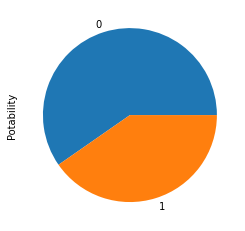

In [8]:
# 데이터 균형 확인
df.Potability.value_counts().plot(kind ='pie')

In [9]:
# 데이터 균형화
zero  = df[df['Potability']==0]
one = df[df['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

<AxesSubplot:ylabel='Potability'>

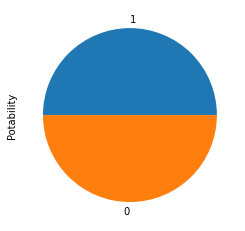

In [10]:
# 데이터 균형 확인
df.Potability.value_counts().plot(kind ='pie')

<AxesSubplot:>

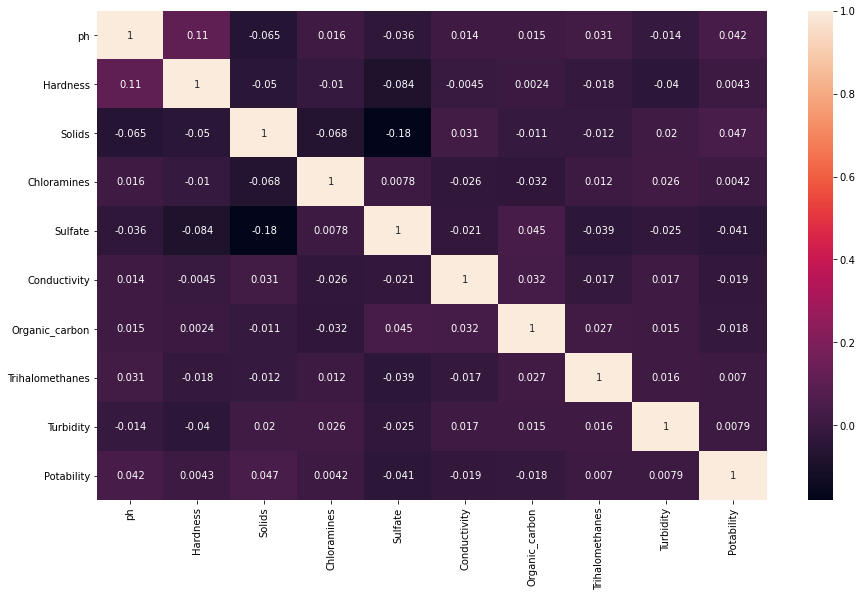

In [11]:
# 데이터 상관관계 확인
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='ph', ylabel='Hardness'>

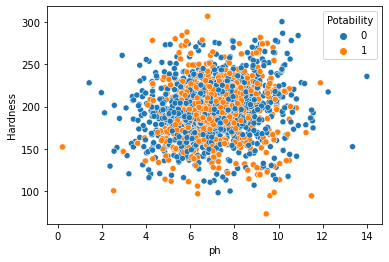

In [13]:
# ph와 Hardness의 관계 확인
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)

<AxesSubplot:xlabel='ph', ylabel='Chloramines'>

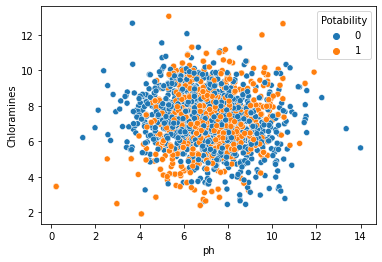

In [14]:
# ph와 Chloramines의 관계 확인
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability, data=df)

In [15]:
# Potability와의 상관 관계 확인
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.047048
ph                 0.041880
Sulfate            0.040541
Conductivity       0.019425
Organic_carbon     0.017553
Turbidity          0.007895
Trihalomethanes    0.006986
Hardness           0.004298
Chloramines        0.004152
Name: Potability, dtype: float64

In [16]:
# 모델예측 대상인 Potability 변수 분리
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [17]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
# 90:10 으로 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [20]:
# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier()

In [21]:
# 랜덤 포레스트 모델 학습
rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# 랜덤 포레스트 모델 정확도 확인
predicted = rf.predict(X_test)

In [23]:
# 랜덤 포레스트 모델 정확도 출력
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.8458333333333333

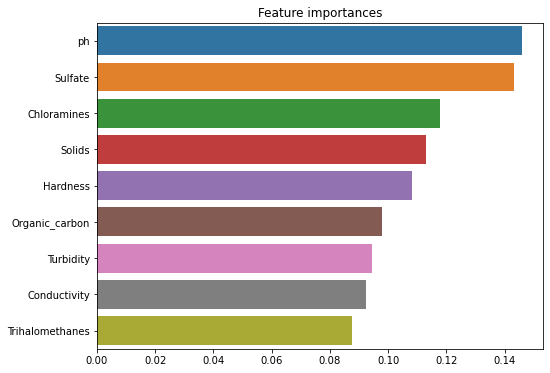

In [27]:
# 모델에 기여도 높은 변수 시각화
importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x = top20, y = top20.index)
plt.show()